# Performing the Exploratory Data Analysis over the cleaned dataset

![WALMART](https://www.pngplay.com/wp-content/uploads/9/Walmart-PNG-HD-Quality.png)


<b>Objectives :</b>

- Visualize the distribution of the dataset
- Visualizing the sales over time
- Visualizing holiday effects on sales
- Checking the data correlations




# Visualizing the distribution of the dataset

In [82]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
# Retrieving the data

data = pd.read_csv('Data_Cleaned.csv')

In [84]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


array([[<AxesSubplot: title={'center': 'Store'}>,
        <AxesSubplot: title={'center': 'Weekly_Sales'}>,
        <AxesSubplot: title={'center': 'Holiday_Flag'}>],
       [<AxesSubplot: title={'center': 'Temperature'}>,
        <AxesSubplot: title={'center': 'Fuel_Price'}>,
        <AxesSubplot: title={'center': 'CPI'}>],
       [<AxesSubplot: title={'center': 'Unemployment'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

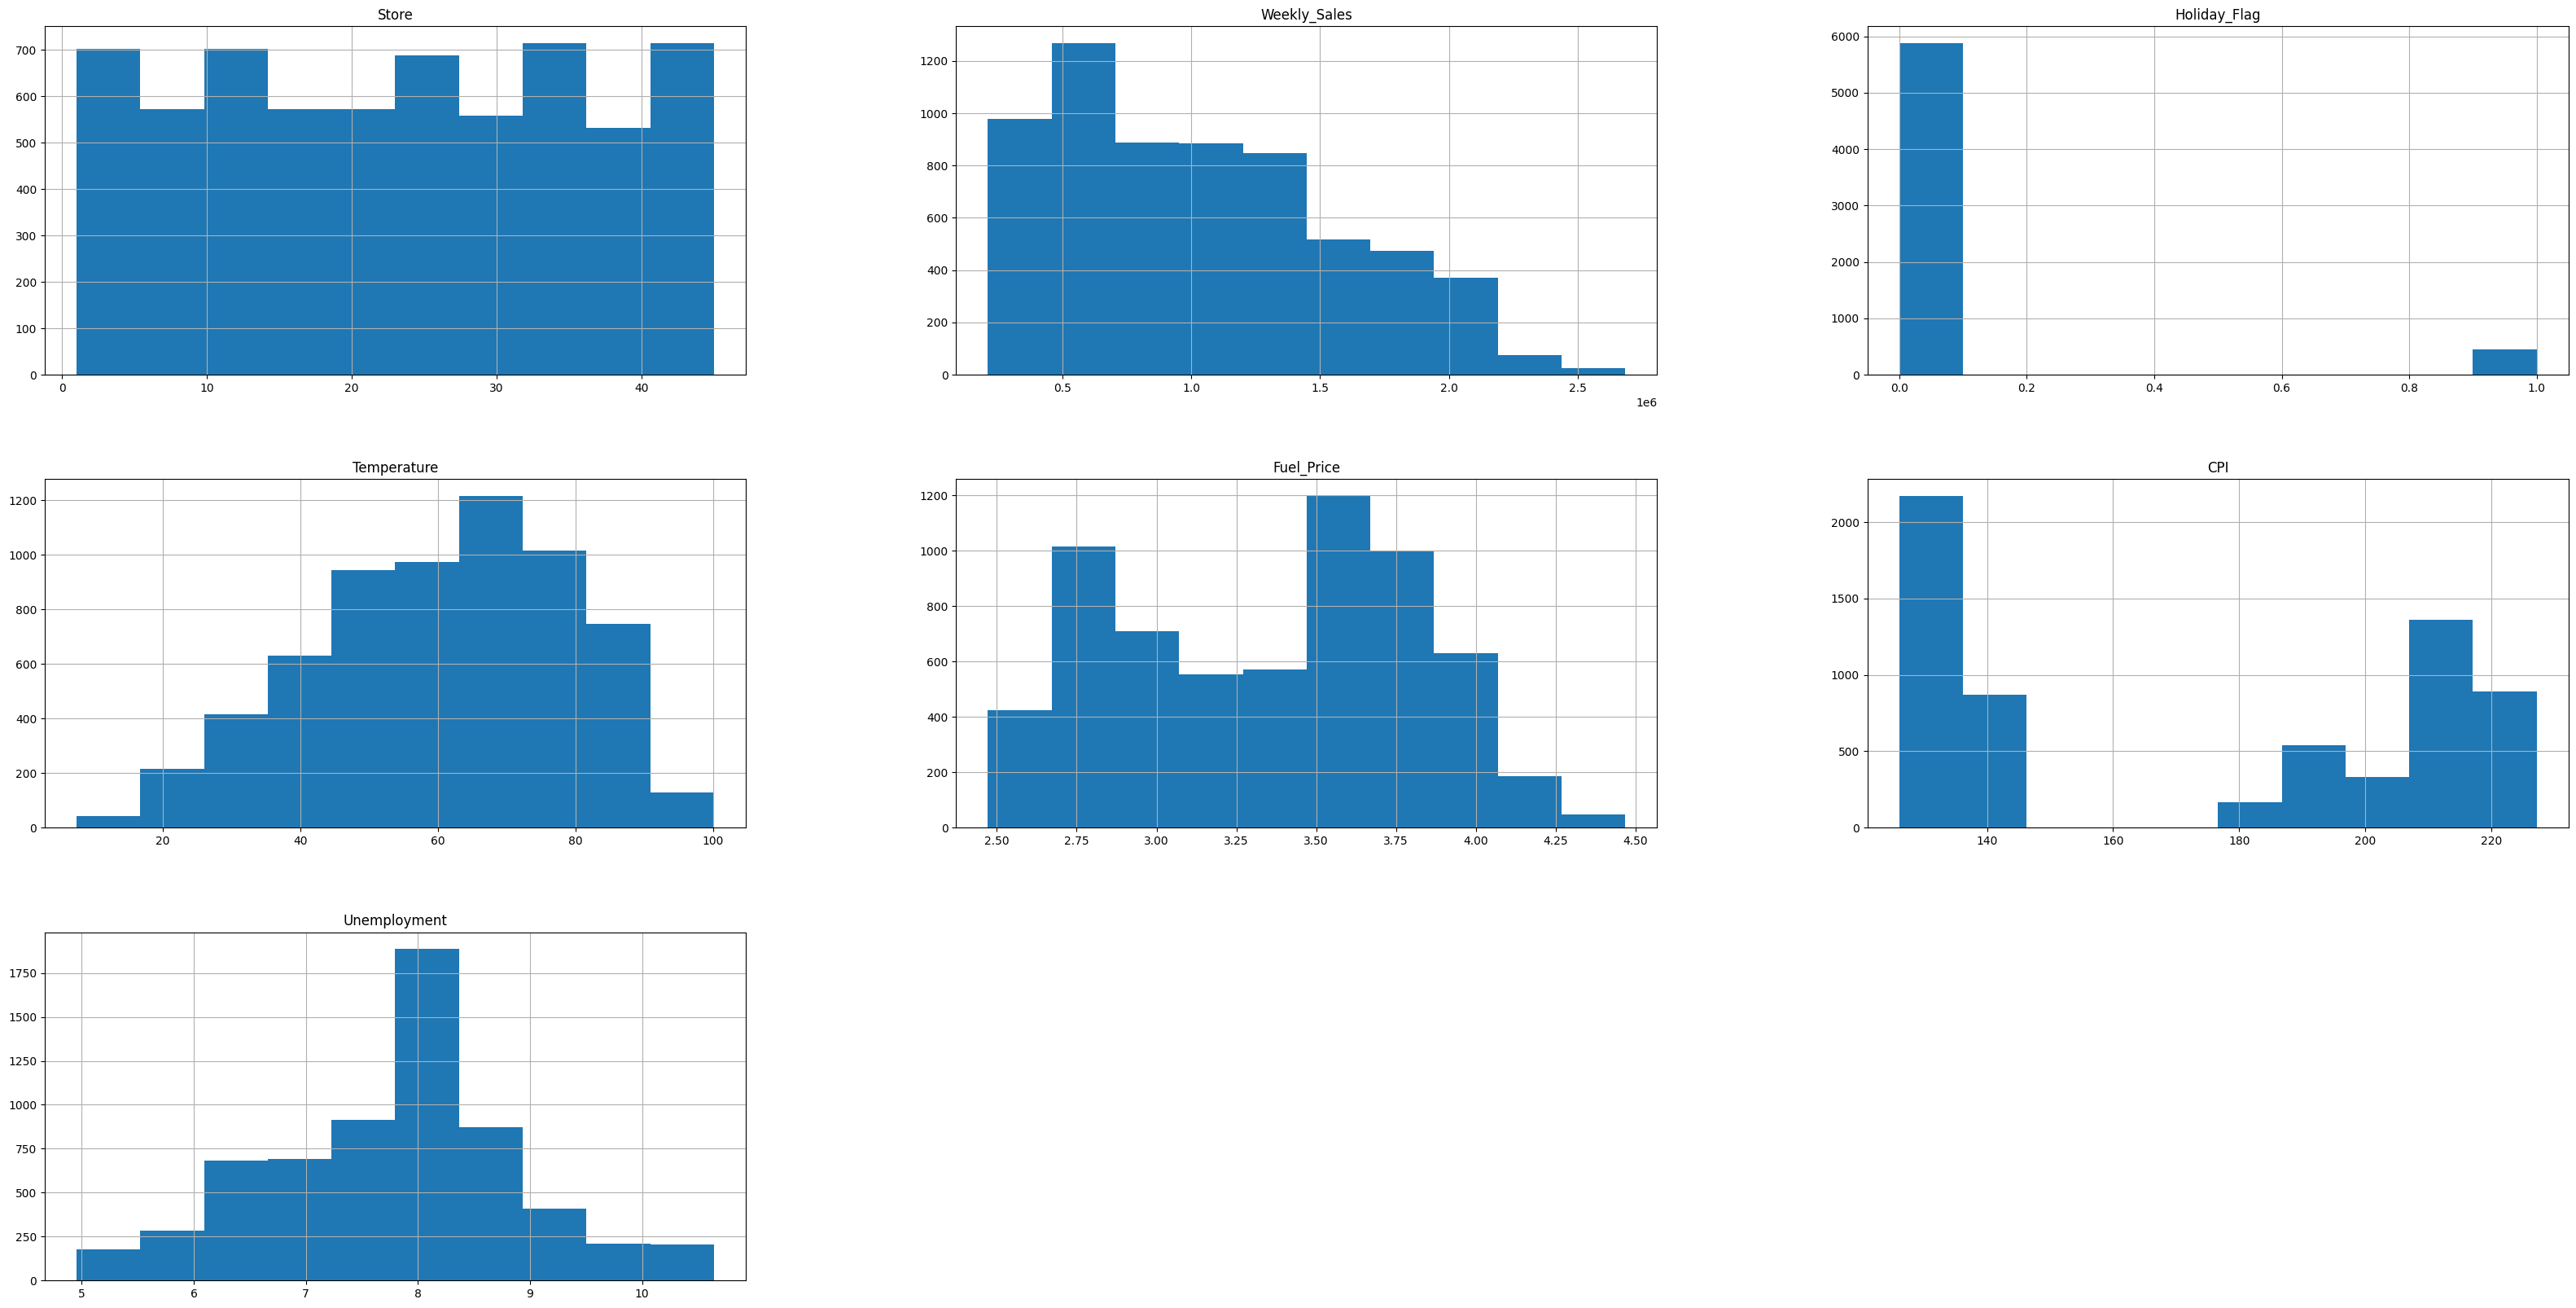

In [85]:
data.hist(figsize=(40,20))

<b> Inference : </b>
- the number of transactions occurred almost evenly across various stores and years.
- The distribution of weekly_sales right-skewed. 
- The distribution of temperature is approximately normal,a little bit left-skewed.
- The distribution of fuel_price is bi-modal.
- CPI formed two clusters.
= unemployment rate is near normally distributed.

# Visualizing the sales over time


In [86]:
# We have a column with the date information
data['Date'] = pd.to_datetime(data['Date'])
data['Date'].head()

0   2010-05-02
1   2010-12-02
2   2010-02-19
3   2010-02-26
4   2010-05-03
Name: Date, dtype: datetime64[ns]

In [87]:
# Using it to create a column month for plotting the monthly,yearly data sales

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month

In [88]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


In [89]:
data['year'].value_counts()

2011    2286
2010    2160
2012    1883
Name: year, dtype: int64

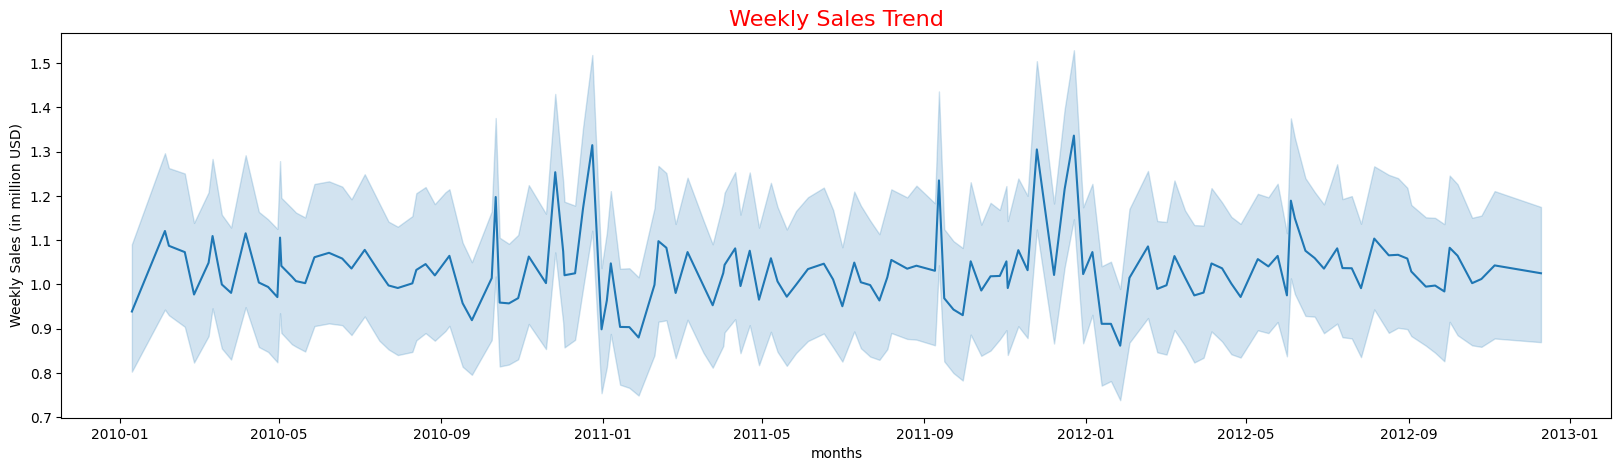

In [90]:
# Sales over months

fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=data.Date, y=(data.Weekly_Sales/1e6))
plt.xlabel('months')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend',fontdict={'fontsize': 16, 'color':'red'}, pad=5)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

plt.show()

<b> Inference : </b> Sales grows in the month of :

- November
- December

# Visualizing the holiday effects over sales

In [91]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


In [92]:
holiday = data[data['Holiday_Flag']==1]
non_holiday = data[data['Holiday_Flag']!=1]

{'whiskers': [<matplotlib.lines.Line2D at 0x2bc59a910>,
 'caps': [<matplotlib.lines.Line2D at 0x2bc59be90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bc59a190>],
 'medians': [<matplotlib.lines.Line2D at 0x2bc5cd090>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bc5cd8d0>],
 'means': []}

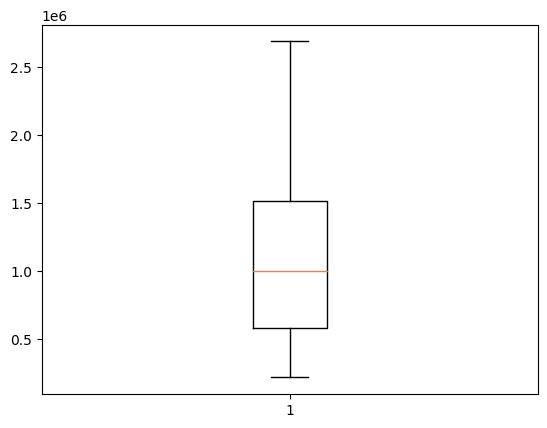

In [97]:
plt.boxplot(holiday['Weekly_Sales'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2bc60c710>,
 'caps': [<matplotlib.lines.Line2D at 0x2bc60da50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bc506f50>],
 'medians': [<matplotlib.lines.Line2D at 0x2bc60e9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bafa7b90>],
 'means': []}

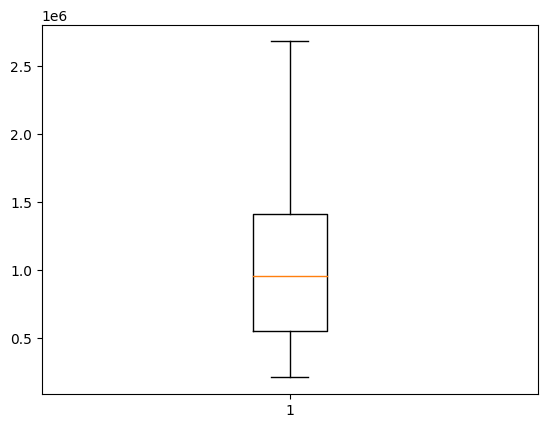

In [98]:
plt.boxplot(non_holiday['Weekly_Sales'])

# Creating the heatmap to check for the data correlations

/var/folders/4r/21z41gt55tdf56zf__j7s8b80000gn/T/ipykernel_24636/3245536585.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap ="YlGnBu")


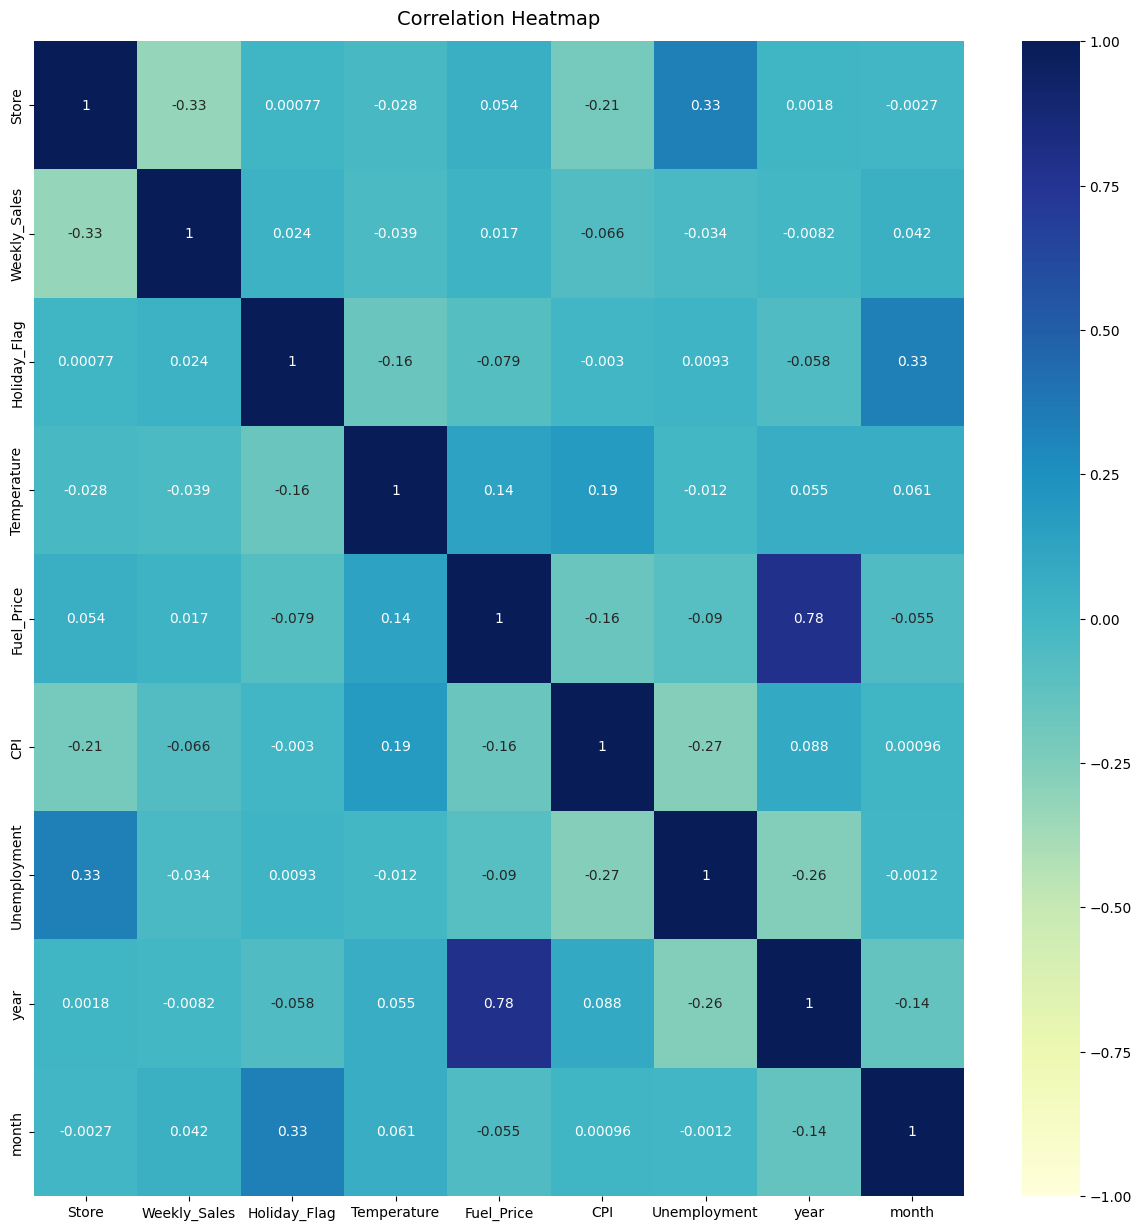

In [99]:
fig, ax = plt.subplots(figsize=(15,15))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap ="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);